# Continuous Signals

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Elementary Operations

Operations like superposition, temporal shifting and scaling are used to construct signals with a more complex structure than the previously introduced [standard signals](standard_signals.ipynb). A set of elementary operations is introduced that are frequently used in signal processing.

### Superposition

The weighted superposition $x(t)$ of two signals $x_1(t)$ and $x_2(t)$ is given as

\begin{equation}
x(t) = A \cdot x_1(t) + B \cdot x_2(t)
\end{equation}

with the complex weights $A, B \in \mathbb{C}$.

**Example**

The following example illustrates the superposition of two harmonic signals $x(t) = A \cdot \cos(\omega_1 t) + B \cdot \cos(\omega_2 t)$ with weights $A$, $B$ and angular frequencies $\omega_1$ and $\omega_2$.

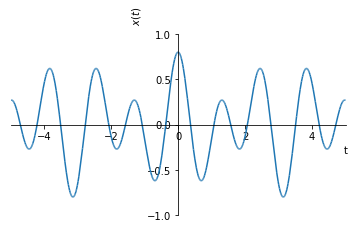

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)

A = .3
om1 = 3
B = .5
om2 = 5

x = A*sym.cos(om1*t) + B*sym.cos(om2*t)

sym.plot(x, (t, -5, 5), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');

### Temporal Shift

The temporal shift of a signal $s(t)$ by the time $\tau$ is a frequently applied operation in signal processing. For instance, to model the propagation of signals from an actuator to a sensor. The temporally shifted signal $x(t)$ is defined as

\begin{equation}
x(t) = s(t-\tau)
\end{equation}

with $\tau \in \mathbb{R}$. The signal $s(t)$ is

* shifted to the right (*delayed*) for $\tau > 0$
* shifted to the left for $\tau < 0$

**Example**

In order to illustrate the temporal shifting of signals, the construction of a staircase signal by a superposition of shifted [rectangular signals](standard_signals.ipynb#Rectangular-Signal) is considered

\begin{equation}
x(t) = \text{rect}\left(t - \frac{2}{3} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right)
\end{equation}



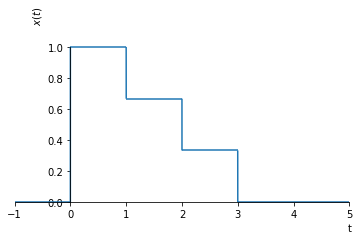

In [2]:
rect = sym.Heaviside(t + 1/2) - sym.Heaviside(t - 1/2)
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)

sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

**Exercise**

* Add another step to the beginning of the staircase signal by modifying above example.

### Temporal Scaling

The temporal scaling of a signal $s(t)$ is defined as

\begin{equation}
x(t) = s(a \cdot t)
\end{equation}

with $a \in \mathbb{R}$. The signal $s(t)$ is

* stretched for $0 < a < 1$
* compressed for $a > 1$
* time-reversed and scaled for $a < 0$

An application of temporal scaling in signal processing is the modeling of the [Doppler effect](https://en.wikipedia.org/wiki/Doppler_effect).

**Example**

The following example illustrates the scaling of the staircase signal $y(t) = x(a \cdot t)$ introduced in the previous example.

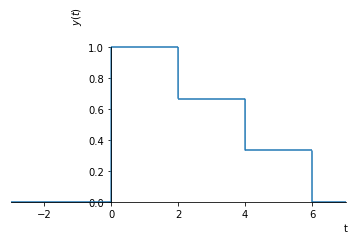

In [3]:
a = .5
y = x.subs(t, a*t)

sym.plot(y.subs(a, 1/2), (t, -3, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$');

**Exercise**

* Modify above example such that the signal is compressed.
* Modify above example such that the signal is scaled and time reversed. What scaling factor `a` leads to a stretching/compression in this context?

### Temporal Flipping

The temporal flipping of a signal $s(t)$ is defined as

\begin{equation}
x(t) = s(\tau - t)
\end{equation}

for $\tau \in \mathbb{R}$. As $s(\tau - t) = s(- (t - \tau))$ the flipping operation can also be represented as a time-reversal of the signal $s(t)$ followed by a shift of $\tau$ of the reversed signal. For $\tau = 0$ this results in only a time-reversal of the signal. 

The temporal flipping operation can interpreted geometrically as a mirroring of the signal $s(t)$ at the vertical axis $t=\frac{\tau}{2}$.

**Example**

The following example illustrates the temporal flipping of the staircase signal $x(t)$ introduced before.

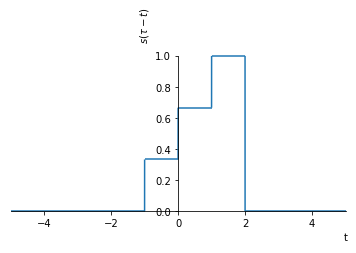

In [4]:
tau = 2
y = x.subs(t, tau - t)

sym.plot(y,(t, -5, 5), ylim=[-0.2, 1.2], ylabel=r'$s(\tau-t)$');

**Excercise**

* For what value $\tau$ does the signal start at $t=0$?
* Realize the temporal flipping by splitting it into two operations: (i) time-reversal and (ii) temporal shift.

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.